In [1]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import scipy.io as sio
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import random
from collections import Counter
np.random.seed(0)
random.seed(0)
ran=0
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,BaggingRegressor

import xgboost as xgb
import os
import seaborn as sn
import pandas as pd
from sklearn.utils import class_weight
from sklearn import preprocessing

import mat73

In [2]:

path = r'D:/COVID/COVID_HF_spectrum/result/'  # result folder : over lap is 30s 

Data_ver=['COVID','healthy','dyspnea_normal','dyspnea_exercise','sleep'] 


#'COVID'
# path1=os.path.join(path, 'Feat_NCS/featureAll/acc_gyro_seperate_v1_newTh2/all_p_Feat.mat')
FeatVer='v1_newTh1'
path1=os.path.join(path, r'Feat_NCS/featureAll/'+FeatVer +r'/all_p_Feat_covid.mat')
data = mat73.loadmat(path1)
feat_acc_covid=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_covid=data['EpochFeat_sel_ncs_all_p']
p_ncs_covid=data['p_num_ncs_all_p']  # number of participant of every feature 
p_acc_covid=data['p_num_acc_all_p']
seg_acc_covid=data['seg_num_acc_all_p']

#'healthy'
path_t=os.path.join(path, 'Feat_NCS_healthy/featureAll/acc_gyro_seperate_v1/01_allFeat_healthy.mat')
data = mat73.loadmat(path_t)
feat_acc_healthy=data['EpochFeat_sel_acc'] # 3 optimal channels, choose 0 channel first  
feat_ncs_healthy=data['EpochFeat_sel_ncs']



#'sleep'

path_t=os.path.join('D:/COVID/sleep study/dataSet/featureAll', 'feature_data.mat')
data = sio.loadmat(path_t)
feat_ncs_sleep_Normal=data['featureNCS_0']
feat_ncs_sleep_Disorder=data['featureNCS_1']
p_ncs_sleep_Normal=data['caseNumNCS_0']
p_ncs_sleep_Disorder=data['caseNumNCS_1']

feat_psg_sleep_Normal=data['featurePSG_0']
feat_psg_sleep_Disorder=data['featurePSG_1']
p_psg_sleep_Normal=data['caseNumPSG_0']
p_psg_sleep_Disorder=data['caseNumPSG_1']





In [3]:
path_t=os.path.join(path, 'dyspnea/featureAll/dyspnea_normal_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Normal=data['EpochFeat_ncs_all'] # 3 optimal channels, choose 0 channel first  
feat_bio_dysp_Normal=data['EpochFeat_bio_all']
p_ncs_dysp_Normal=data['case_num_ncs']  # number of participant of every feature 
p_bio_dysp_Normal=data['case_num_bio']

path_t=os.path.join(path, 'dyspnea/featureAll/dyspnea_exercise_feat.mat')
data = sio.loadmat(path_t)
feat_ncs_dysp_Exercise=data['EpochFeat_ncs_all'] 
feat_bio_dysp_Exercise=data['EpochFeat_bio_all']
p_ncs_dysp_Exercise=data['case_num_ncs'] 
p_bio_dysp_Exercise=data['case_num_bio']
   
    # model 1: binary class  only label normal =1, exercise =0  in dyspnea study 


# model 2: dyspnea score 

score13_n=np.array([4, 9 ,2, 2 ,4 ,3, 6 ,9, 3, 2, 1, 4, 5 ,8, 3,\
    5,3,6,7,7,4,4,7,8,4,6,8,5,1,7,8,3])  # case 1-15  + 16-32   all score for 32 participatns 
score_ncs_dysp_Exercise=np.zeros((np.shape(feat_ncs_dysp_Exercise)[0],1))
for i in range(32):

    score_ncs_dysp_Exercise[p_ncs_dysp_Exercise==i+1]=score13_n[i]

score_ncs_dysp_Normal=np.zeros((np.shape(feat_ncs_dysp_Normal)[0],1))



# ver_dyspNew='v2'
ver_dyspNew='v3_test'
path_t=os.path.join(path, r'dyspnea_study_new/featureAll/'+ver_dyspNew+r'/NormalBreath_all_p_LF_feat.mat')
data = mat73.loadmat(path_t)
feat_acc_dyspNew_Normal=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_dyspNew_Normal=data['EpochFeat_sel_ncs_all_p']
p_ncs_dyspNew_Normal=data['p_num_ncs_all_p']  # number of participant of every sample 
p_acc_dyspNew_Normal=data['p_num_acc_all_p']

path_t=os.path.join(path, r'dyspnea_study_new/featureAll/'+ver_dyspNew+r'/PostExercise_all_p_LF_feat.mat')
data = mat73.loadmat(path_t)
feat_acc_dyspNew_Exercise=data['EpochFeat_sel_acc_all_p'] # 3 optimal channels, choose 0 channel first  
feat_ncs_dyspNew_Exercise=data['EpochFeat_sel_ncs_all_p']
p_ncs_dyspNew_Exercise=data['p_num_ncs_all_p']  # number of participant of every sample 
p_acc_dyspNew_Exercise=data['p_num_acc_all_p']


In [4]:
feat_len=51

X_train=np.vstack((feat_ncs_dysp_Normal,feat_ncs_dysp_Exercise))[:,:feat_len]
y_train=np.vstack((score_ncs_dysp_Normal,score_ncs_dysp_Exercise)).ravel()
print(np.unique(y_train))
X_test_acc_covid=feat_acc_covid[:,:feat_len,0]

X_test_acc_dyspNew_Normal=feat_acc_dyspNew_Normal[:,:feat_len,0]

X_train_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_train)

X_test_acc_covid_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_test_acc_covid)
#X_test_ncs_covid_scaler=preprocessing.StandardScaler().fit(X_train).transform(feat_ncs_covid[:,:51])

X_test_acc_dyspNew_Normal_scaler=preprocessing.StandardScaler().fit(X_train).transform(X_test_acc_dyspNew_Normal)
X_test_ncs_dyspNew_Normal_scaler=preprocessing.StandardScaler().fit(X_train).transform(feat_ncs_dyspNew_Normal[:,:feat_len])

X_test_acc_dyspNew_Exercise_scaler=preprocessing.StandardScaler().fit(X_train).transform(feat_acc_dyspNew_Exercise[:,:feat_len,0])

X_test_ncs_dyspNew_Exercise_scaler=preprocessing.StandardScaler().fit(X_train).transform(feat_ncs_dyspNew_Exercise[:,:feat_len])




[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [5]:

clf1=KNeighborsRegressor(n_neighbors=10)

clf2 = DecisionTreeRegressor(random_state=0,max_depth=15)

clf3 = GaussianNB(var_smoothing=0.5)
clf4= svm.SVR(kernel="poly", C=0.7)
clf5 = RandomForestRegressor(max_depth=13,random_state=0,n_estimators=20)
clf6 = BaggingRegressor(base_estimator=clf3,n_estimators=10, random_state=0)

clf7 = xgb.XGBRegressor(n_estimators=5)
 
# clf=clf7.fit(X_train, y_train)
# y_pred_test = clf.predict(X_test)
model=clf1.fit(X_train_scaler, y_train)
y_pred_test_acc_covid = model.predict(X_test_acc_covid_scaler)
y_pred_test_acc_covid=np.array(y_pred_test_acc_covid)
# y_pred_test_ncs_covid = model.predict(X_test_ncs_covid_scaler)
# y_pred_test_ncs_covid=np.array(X_test_ncs_covid_scaler)

mean_y_pred_test_acc_covid=np.mean(y_pred_test_acc_covid)

print( "mean COVID score {:.2f}".format(mean_y_pred_test_acc_covid))
print("std COVID score {:.2f}".format(np.std(y_pred_test_acc_covid)))

# print(np.mean(y_pred_test_ncs_covid))

# print(np.std(y_pred_test_ncs_covid))




y_pred_test_acc_dyspNew_Normal= model.predict(X_test_acc_dyspNew_Normal_scaler)
y_pred_test_acc_dyspNew_Normal=np.array(y_pred_test_acc_dyspNew_Normal)

mean_y_pred_test_acc_dyspNew_Normal=np.mean(y_pred_test_acc_dyspNew_Normal)
print( "mean acc_dyspNew_Normal score {:.2f}".format(mean_y_pred_test_acc_dyspNew_Normal))

std_y_pred_test_acc_dyspNew_Normal=np.std(y_pred_test_acc_dyspNew_Normal)
# print(std_y_pred_test_acc_dyspNew_Normal)



y_pred_test_acc_dyspNew_Exercise= model.predict(X_test_acc_dyspNew_Exercise_scaler)
y_pred_test_acc_dyspNew_Exercise=np.array(y_pred_test_acc_dyspNew_Exercise)


mean_y_pred_test_acc_dyspNew_Exercise=np.mean(y_pred_test_acc_dyspNew_Exercise)
print( "mean acc_dyspNew_Exercise score {:.2f}".format(mean_y_pred_test_acc_dyspNew_Exercise))
std_y_pred_test_acc_dyspNew_Exercise=np.std(y_pred_test_acc_dyspNew_Exercise)
#print(std_y_pred_test_acc_dyspNew_Exercise)




y_pred_test_ncs_dyspNew_Normal= model.predict(X_test_ncs_dyspNew_Normal_scaler)
y_pred_test_ncs_dyspNew_Normal=np.array(y_pred_test_ncs_dyspNew_Normal)

mean_y_pred_test_ncs_dyspNew_Normal=np.mean(y_pred_test_ncs_dyspNew_Normal)
print( "mean ncs_dyspNew_Normal score {:.2f}".format(mean_y_pred_test_ncs_dyspNew_Normal))
std_y_pred_test_ncs_dyspNew_Normal=np.std(y_pred_test_ncs_dyspNew_Normal)
#print(std_y_pred_test_ncs_dyspNew_Normal)



y_pred_test_ncs_dyspNew_Exercise= model.predict(X_test_ncs_dyspNew_Exercise_scaler)
y_pred_test_ncs_dyspNew_Exercise=np.array(y_pred_test_ncs_dyspNew_Exercise)


mean_y_pred_test_ncs_dyspNew_Exercise=np.mean(y_pred_test_ncs_dyspNew_Exercise)
print( "mean ncs_dyspNew_Exercise score {:.2f}".format(mean_y_pred_test_ncs_dyspNew_Exercise))
std_y_pred_test_ncs_dyspNew_Exercise=np.std(y_pred_test_ncs_dyspNew_Exercise)
#print(std_y_pred_test_ncs_dyspNew_Exercise)





mean COVID score 4.34
std COVID score 0.83
mean acc_dyspNew_Normal score 1.06
mean acc_dyspNew_Exercise score 2.42
mean ncs_dyspNew_Normal score 1.20
mean ncs_dyspNew_Exercise score 2.91


In [18]:
from scipy import stats
t_stat,p=stats.ttest_ind(y_pred_test_acc_covid, y_pred_test_ncs_dyspNew_Exercise,)
t_stat2,p2=stats.ttest_ind(y_pred_test_acc_covid, y_pred_test_ncs_dyspNew_Normal)
print(t_stat,p)
print(t_stat2,p2)

23.043278957540256 1.3032896576167335e-114
115.13946481923979 0.0


In [7]:
# score prediction by using all epochs in all participants, 
# function get an output of mean score in every participants epochs 

def score_per(y_pred_test,p_all):
    score_pred=y_pred_test.copy()
    perNum=len(np.unique(p_all))
    score_pred_per_mean=np.zeros((perNum,1))
    score_pred_per_std=np.zeros((perNum,1))

    for i in range(perNum):  # COVID patient number 3,13
        
        
        ind_temp=np.where(p_all==np.unique(p_all)[i])[0]
    

        score_pred_per_mean[i]=np.mean(score_pred[ind_temp])
        score_pred_per_std[i]=np.std(score_pred[ind_temp])
     

    print(np.mean(score_pred_per_mean))
    print(np.mean(score_pred_per_std))
    return score_pred_per_mean,score_pred_per_std

score_covid_pred_per_mean,score_covid_pred_per_std=score_per(y_pred_test_acc_covid,p_acc_covid)
#score_covid_pred_per_mean,score_covid_pred_per_std=score_per(y_pred_test_ncs_covid,p_ncs_covid)
score_acc_dyspNew_Normal_pred_per_mean,score_acc_dyspNew_Normal_pred_per_std=score_per(y_pred_test_acc_dyspNew_Normal,p_acc_dyspNew_Normal)
score_ncs_dyspNew_Normal_pred_per_mean,score_ncs_dyspNew_Normal_pred_per_std=score_per(y_pred_test_ncs_dyspNew_Normal,p_ncs_dyspNew_Normal)

score_acc_dyspNew_Exercise_pred_per_mean,score_acc_dyspNew_Exercise_pred_per_std=score_per(y_pred_test_acc_dyspNew_Exercise,p_acc_dyspNew_Exercise)
score_ncs_dyspNew_Exercise_pred_per_mean,score_ncs_dyspNew_Exercise_pred_per_std=score_per(y_pred_test_ncs_dyspNew_Exercise,p_ncs_dyspNew_Exercise)
# for i in range(1,13):  # COVID patient number 3,13
#     ind_temp=np.where(p_acc_dyspNew_Normal==i)[0]
  
#     score_acc_dyspNew_Normal_pred_per_mean[i-4]=np.mean(y_pred_test_acc_dyspNew_Normal[ind_temp])
#     score_acc_dyspNew_Normal_pred_per_std[i-4]=np.std(y_pred_test_acc_dyspNew_Normal[ind_temp])
# print(np.mean(score_covid_pred_per_mean))
# print(np.mean(score_covid_pred_per_std))




4.393678267679685
0.5858621542467375
1.2765585344486006
0.7972325417524733
1.262585520434938
0.724906957995198
2.34785920094565
1.0423217303520205
2.724718247564401
1.0568920464386138


mean score:  COVID:4.39  Norm:1.26  Post Exercise:2.72  


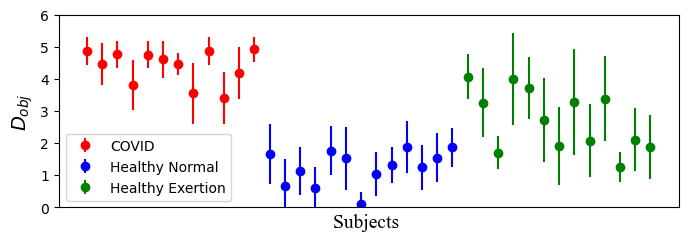

In [20]:
opt='ncs'
# opt='acc'
y=score_covid_pred_per_mean.ravel()
y_error=score_covid_pred_per_std.ravel()
x=np.arange(len(y))+1

if opt=='ncs':
    y2=score_ncs_dyspNew_Normal_pred_per_mean.ravel()
    y2_error=score_ncs_dyspNew_Normal_pred_per_std.ravel()

    y3=score_ncs_dyspNew_Exercise_pred_per_mean.ravel()
    y3_error=score_ncs_dyspNew_Exercise_pred_per_std.ravel()
if opt=='acc':
    y2=score_acc_dyspNew_Normal_pred_per_mean.ravel()
    y2_error=score_acc_dyspNew_Normal_pred_per_std.ravel()

    y3=score_acc_dyspNew_Exercise_pred_per_mean.ravel()
    y3_error=score_acc_dyspNew_Exercise_pred_per_std.ravel()
x2=np.arange(len(y2))+len(y)+1
x3=np.arange(len(y3))+len(y2)+len(y)+1







sz=14
labelN=['COVID','Healthy Normal','Healthy Exertion']
plt.errorbar(x, y, yerr = y_error,fmt='o',ecolor = 'red',color='r',label=labelN[0])
plt.errorbar(x2, y2, yerr = y2_error,fmt='o',ecolor = 'blue',color='b',label=labelN[1])
plt.errorbar(x3, y3, yerr = y3_error,fmt='o',ecolor = 'green',color='g',label=labelN[2])
axis_font={'fontname':'Times New Roman', 'size':str(sz)}
plt.legend(loc='lower left')
plt.xlabel('Subjects ',axis_font)
plt.ylabel('$D_{obj}$',axis_font)
plt.ylim(0,6)
plt.xticks([]) 

s='mean score:  COVID:{n1:.2f}  Norm:{n2:.2f}  Post Exercise:{n3:.2f}  '.format(n1=np.mean(y),n2=np.mean(y2),n3=np.mean(y3))
#plt.text(10,5,s,axis_font)
print(s)
figure = plt.gcf()
figure.set_size_inches(8, 2.5)




# tleSave='score_per_covid_acc_v1_newTh1_Normal_ncs_exer_ncs_v3_test'
if opt=='ncs':
    tleSave='score_pred_perAll_COVID_acc'+FeatVer+ 'dyspNew_ncs'+ver_dyspNew
if opt=='acc':
    tleSave='score_pred_perAll_COVID_acc'+FeatVer+ 'dyspNew_acc'+ver_dyspNew
saveFigPath=r"D:\COVID\ML model code"
plt.savefig(saveFigPath+r"/fig_python/"+tleSave+".png", dpi=300)

plt.show()



In [33]:
from scipy import stats
t_stat,p=stats.ttest_ind(y, y2,equal_var=False)
t_stat2,p2=stats.ttest_ind(y,y3,equal_var=False)
t_stat3,p3=stats.ttest_ind(y2,y3,equal_var=False)
# t_stat,p=stats.ttest_ind(y, y2)
# t_stat2,p2=stats.ttest_ind(y,y3)
print(t_stat,p)
print(t_stat2,p2)
print(t_stat3,p3)

14.559923900492247 4.614711937872428e-13
5.467448273556703 2.7507814584580066e-05
-4.820327810510896 0.00011817899354993294


4.96481500704658
0.34940021940843213
16
4.78829213939977
0.38150041070910196
9
3.810950177672566
0.7290607672564333
14
4.5820278305806665
0.5231483500075792
16
3.568434888139167
0.7842041295910919
12
4.298984065576162
0.704652421370591
13


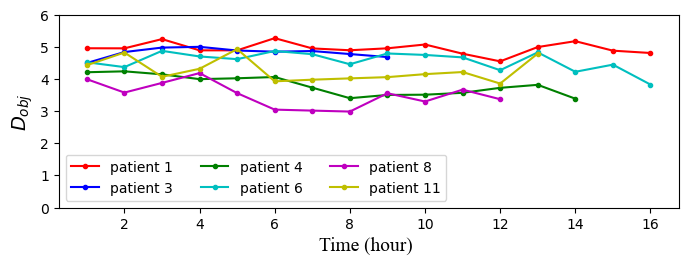

In [9]:
 # COVID patient selected 
 # plot continous scoring based on every half hour (seg)
        
p_num=[3,5,6,8,10,13]
y=[]
y_error=[]
y_all=[]
y_error_all=[]

for i in range (len(p_num)):
    score_covid_p_sel_seg_mean,score_covid_p_sel_seg_std=score_per\
        (y_pred_test_acc_covid[np.where(p_acc_covid==p_num[i])[0]],seg_acc_covid[np.where(p_acc_covid==p_num[i])[0]])

    y_all.append(score_covid_p_sel_seg_mean)
    y_error_all.append(score_covid_p_sel_seg_std)
    time_len=round(len(score_covid_p_sel_seg_mean)/2)
    print(time_len)
    y.append(score_covid_p_sel_seg_mean[:time_len])
    y_error.append(score_covid_p_sel_seg_std[:time_len])


sz=14

CN=['r','b','g','c','m','y']
for j in range(len(p_num)):
    plt.plot(np.arange(1,len(y[j])+1), y[j],color=CN[j],label='patient '+str(int(p_num[j]-2)), marker=".")



axis_font={'fontname':'Times New Roman', 'size':str(sz)}
plt.legend(loc='lower left',ncol=3)
plt.xlabel('Time (hour) ',axis_font)
plt.ylabel('$D_{obj}$',axis_font)
plt.ylim(0,6)

fig2 = plt.gcf()
fig2.set_size_inches(8, 2.5)


tleSave='continous_score_per_covid_acc_v1_newTh1_per_seg'
saveFigPath=r"D:\COVID\ML model code"
#plt.savefig(saveFigPath+r"/fig_python/"+tleSave+".png", dpi=300)
plt.show()

4.615211061158762
0.5623462237319244
8
4.797243247637342
0.3699220319764421
8
4.473333333333334
0.3465349599405269
1
4.864512923793552
0.4024258316653812
14
3.346014249501092
0.6634492883368563
8
4.95594492471639
0.41067930670369995
3


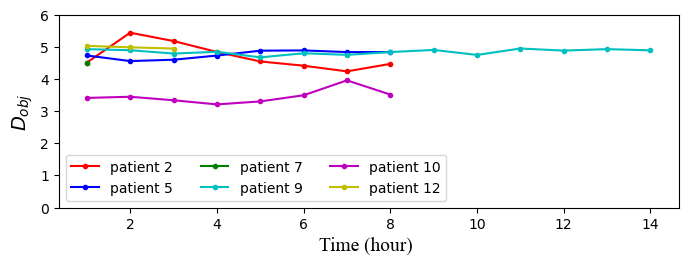

In [10]:
 # COVID patient selected 
 # plot continous scoring based on every half hour (seg)
        
p_num=[4,7,9,11,12,14]
y=[]
y_error=[]
y_all=[]
y_error_all=[]

for i in range (len(p_num)):
    score_covid_p_sel_seg_mean,score_covid_p_sel_seg_std=score_per\
        (y_pred_test_acc_covid[np.where(p_acc_covid==p_num[i])[0]],seg_acc_covid[np.where(p_acc_covid==p_num[i])[0]])

    y_all.append(score_covid_p_sel_seg_mean)
    y_error_all.append(score_covid_p_sel_seg_std)
    time_len=round(len(score_covid_p_sel_seg_mean)/2)
    print(time_len)
    y.append(score_covid_p_sel_seg_mean[:time_len])
    y_error.append(score_covid_p_sel_seg_std[:time_len])


sz=14

CN=['r','b','g','c','m','y']
for j in range(len(p_num)):
    plt.plot(np.arange(1,len(y[j])+1), y[j],color=CN[j],label='patient '+str(int(p_num[j]-2)), marker=".")



axis_font={'fontname':'Times New Roman', 'size':str(sz)}
plt.legend(loc='lower left',ncol=3)
plt.xlabel('Time (hour) ',axis_font)
plt.ylabel('$D_{obj}$',axis_font)
plt.ylim(0,6)

fig2 = plt.gcf()
fig2.set_size_inches(8, 2.5)


tleSave='continous_score_per_covid_acc_v1_newTh1_per_seg'
saveFigPath=r"D:\COVID\ML model code"
#plt.savefig(saveFigPath+r"/fig_python/"+tleSave+".png", dpi=300)
plt.show()